In [73]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [74]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [75]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

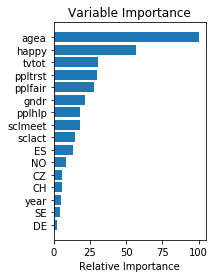

In [76]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

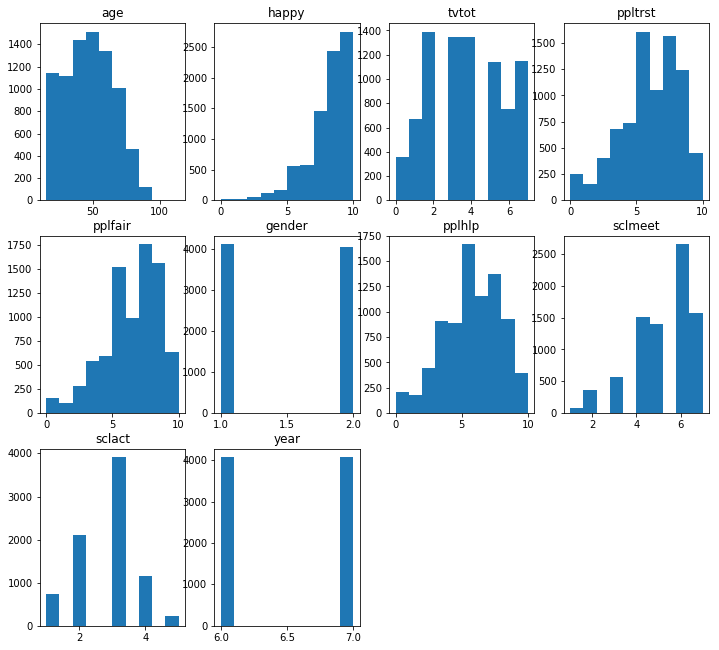

In [78]:
plt.figure(figsize=(12,15))

plt.subplot(4,4,1)
plt.hist(df['agea'])
plt.title('age')

plt.subplot(4,4,2)
plt.hist(df['happy'])
plt.title('happy')

plt.subplot(4,4,3)
plt.hist(df['tvtot'])
plt.title('tvtot')

plt.subplot(4,4,4)
plt.hist(df['ppltrst'])
plt.title('ppltrst')

plt.subplot(4,4,5)
plt.hist(df['pplfair'])
plt.title('pplfair')

plt.subplot(4,4,6)
plt.hist(df['gndr'])
plt.title('gender')

plt.subplot(4,4,7)
plt.hist(df['pplhlp'])
plt.title('pplhlp')

plt.subplot(4,4,8)
plt.hist(df['sclmeet'])
plt.title('sclmeet')

plt.subplot(4,4,9)
plt.hist(df['sclact'])
plt.title('sclact')

plt.subplot(4,4,10)
plt.hist(df['year'])
plt.title('year')

plt.show()

Text(0.5,1,'happy scaled')

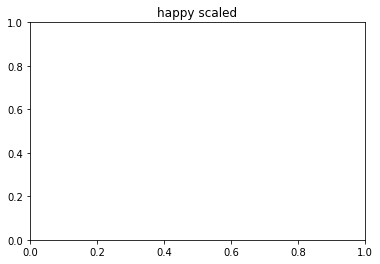

In [80]:
# Create happy values as floats
happy_float = df[['happy']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
happy_scaled = min_max_scaler.fit_transform(happy_float)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(happy_scaled)

#df_normalized.plot(kind='bar')

#plt.hist(df_normalized)
#plt.hist(df['happy scaled'])
plt.title('happy scaled')

In [72]:
def floor_zeroes(value):
        if value == 0: value = 0.001
        
for value in df.happy:
        value.apply(floor_zeroes)        
        
print(0 in df['happy'])
df['log happy'] = np.log(df['happy'].dropna())
#plt.hist(df['log happy'])

AttributeError: 'float' object has no attribute 'apply'

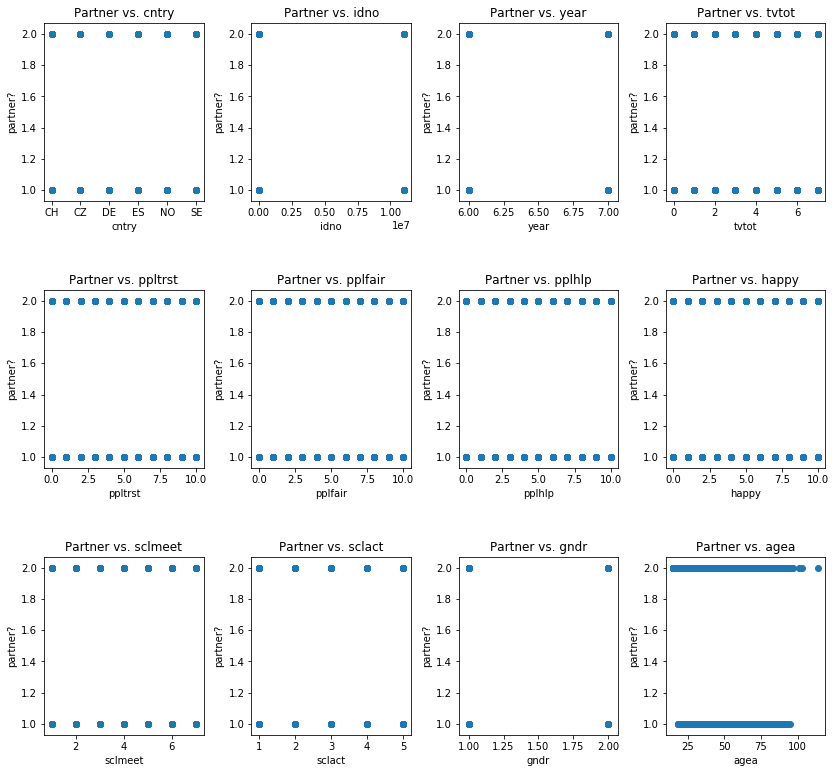

,partner,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea
partner,1.000000,-0.014931,0.018689,-0.028816,-0.034371,-0.034054,-0.022069,-0.145061,0.162970,0.011405,0.033984,-0.256670
idno,-0.014931,1.000000,0.002102,0.003963,-0.007523,0.007397,0.004484,-0.003065,-0.021376,0.004323,0.010851,0.030051
year,0.018689,0.002102,1.000000,-0.031596,-0.001600,0.004283,-0.032901,-0.013378,-0.028502,0.012150,0.001355,-0.003520
tvtot,-0.028816,0.003963,-0.031596,1.000000,-0.142422,-0.119277,-0.069080,-0.118598,-0.078864,-0.092375,0.017922,0.257674
ppltrst,-0.034371,-0.007523,-0.001600,-0.142422,1.000000,0.597506,0.459250,0.231533,0.122555,0.137491,-0.029921,-0.029412
pplfair,-0.034054,0.007397,0.004283,-0.119277,0.597506,1.000000,0.480931,0.247755,0.096501,0.128808,0.022251,0.014724
pplhlp,-0.022069,0.004484,-0.032901,-0.069080,0.459250,0.480931,1.000000,0.215323,0.080489,0.092673,0.042046,0.040351
happy,-0.145061,-0.003065,-0.013378,-0.118598,0.231533,0.247755,0.215323,1.000000,0.182944,0.192030,-0.022413,-0.042970
sclmeet,0.162970,-0.021376,-0.028502,-0.078864,0.122555,0.096501,0.080489,0.182944,1.000000,0.283319,0.009533,-0.194443
sclact,0.011405,0.004323,0.012150,-0.092375,0.137491,0.128808,0.092673,0.192030,0.283319,1.000000,-0.031648,-0.059442


In [36]:
#plot features & target
plt.figure(figsize=(14,18))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i in range(len(df.columns) - 1):
    plt.subplot(4,4,i+1)
    plt.scatter(df.iloc[:,i], df['partner'])
    plt.title("Partner vs. " + str(list(df.columns)[i]))
    plt.xlabel(str(list(df.columns)[i]))
    plt.ylabel("partner?")

plt.show()
df[['partner', 'cntry', 'idno', 'year', 'tvtot', 
    'ppltrst', 'pplfair', 'pplhlp', 'happy', 
    'sclmeet', 'sclact', 'gndr', 'agea',]].corr()

In [37]:
#2) apply overfitting prevention strategies

#Check for overfitting
# test difference in performance for train & test sets
# play around with model parameters to see if model is sensitive
print("R-squared of the model in the training set is: {}".format(clf.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(clf.score(X_test, y_test)))



R-squared of the model in the training set is: 0.7774140752864157
-----Test set statistics-----
R-squared of the model in the test set is: 0.7521472392638037


In [43]:
#3) more iterations
params = {'n_estimators': 2000,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04159847244953628
Percent Type II errors: 0.16134751773049646

Test set accuracy:
Percent Type I errors: 0.06993865030674846
Percent Type II errors: 0.17668711656441718


In [41]:
#different loss functions
from sklearn.metrics import f1_score, accuracy_score

f1_train = f1_score(y_train, predict_train, average='binary')
f1_test = f1_score(y_test, predict_test, average='binary')

acc_train = accuracy_score(y_train, predict_train)
acc_test = accuracy_score(y_test, predict_test)


print("training data f1: {}\ntest data f1: {}\n".format(f1_train, f1_test))
print("training data accuracy: {}\ntest data accuracy: {}\n".format(acc_train, acc_test))



training data f1: 0.6880503144654088
test data f1: 0.6228893058161351

training data accuracy: 0.7970540098199672
test data accuracy: 0.7533742331288343



In [27]:
#try more leaves
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0231860338243317
Percent Type II errors: 0.12302236770321877

Test set accuracy:
Percent Type I errors: 0.08834355828220859
Percent Type II errors: 0.18159509202453988


Changing the number of leaves from 2 to 4 worsens the overfitting. 